In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 17 ##

## Alameda County Jury Panels ##

In [22]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54,0.04)                                                                                                                               
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


In [28]:
a=make_array(5,6,6,6,67,7,736,25,632,3256,256,23)
a

array([   5,    6,    6,    6,   67,    7,  736,   25,  632, 3256,  256,
         23])

In [29]:
sample_proportions(100,a)

ValueError: sum(pvals[:-1]) > 1.0

In [25]:
jury.barh("Eligible")

ValueError: The column 'Ethnicity' contains non-numerical values. A plot cannot be drawn for this column.

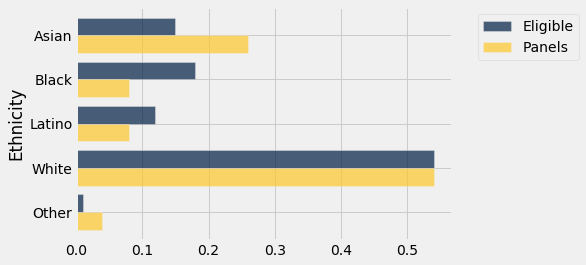

In [4]:
jury.barh('Ethnicity')

In [5]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [37]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([0.14125088, 0.1848208 , 0.12860155, 0.53267744, 0.01264933])

In [38]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.141251
Black,0.18,0.08,0.184821
Latino,0.12,0.08,0.128602
White,0.54,0.54,0.532677
Other,0.01,0.04,0.0126493


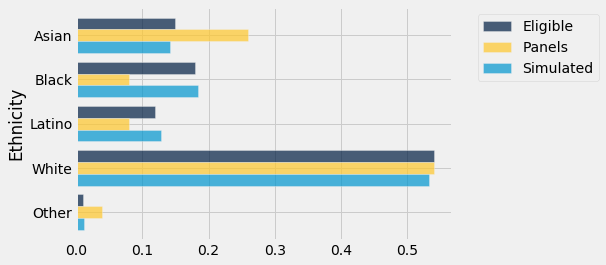

In [39]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [13]:
# In the last lecture, the difference between observed black/purple
# and their expected values (26%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [45]:
diffs = jury.column('Panels') -jury.column('Eligible')
diffs

array([ 0.11, -0.1 , -0.04,  0.  ,  0.03])

## Total Variation Distance

In [74]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [75]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14

In [76]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.029388615600843267

In [77]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


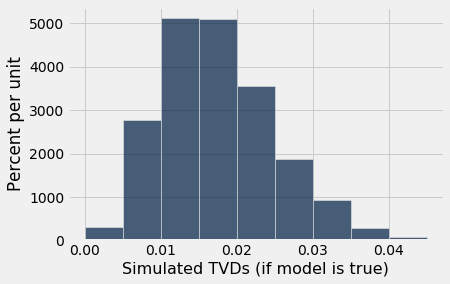

In [85]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))




In [91]:
Chicken=Table().with_columns(
        "Chicken", make_array(4,5,6,7,8),
        "big Chicken",make_array(6,2,4,4,2)
)
Chicken

Chicken,big Chicken
4,6
5,2
6,4
7,4
8,2


In [97]:
b=Chicken.column("Chicken")
b

array([4, 5, 6, 7, 8])

In [95]:
a =Chicken.column("big Chicken")
a

array([6, 2, 4, 4, 2])

In [98]:
b+a

array([10,  7, 10, 11, 10])